In [2]:
# Loading the packages that we need
library(tidyverse)
library(infer)

## Let's generate a population

In [56]:
population <- 
    tibble(grade = rnorm(700000, 70, 8))

population |> head()

grade
<dbl>
61.89201
66.66442
74.68221
72.31434
65.24996
53.76803


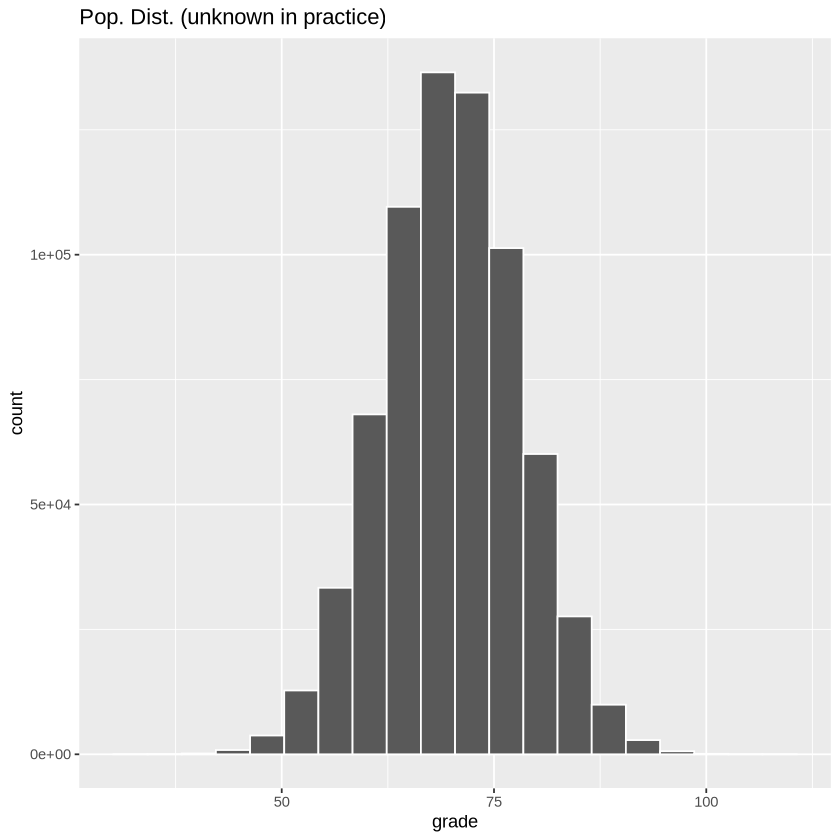

In [57]:
population |>
    ggplot() +
    geom_histogram(aes(grade), color='white', bins=20) +
    ggtitle('Pop. Dist. (unknown in practice)')

## Take a sample from the population

In [59]:
n <- 5000
original_sample <-
    population |>
    rep_sample_n(reps = 1, size = n)|> 
    ungroup() |> 
    select(grade)

original_sample |> head()

grade
<dbl>
76.97217
76.05498
71.50741
71.89652
69.09828
63.66798


In [60]:
mean(original_sample$grade)

[1] 69.97376

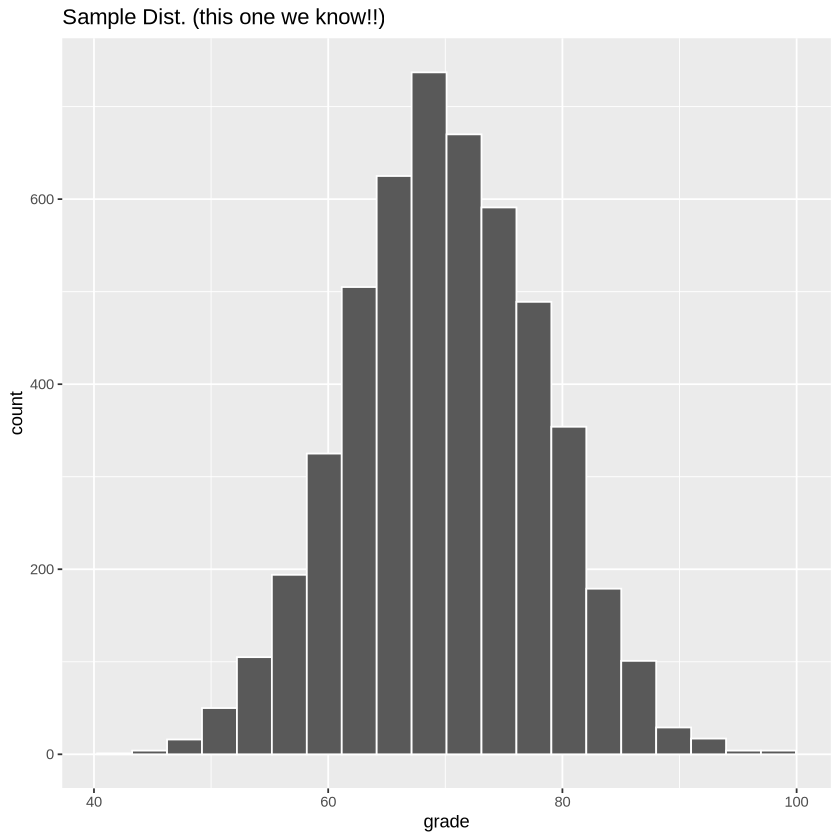

In [61]:
original_sample |>
    ggplot() +
    geom_histogram(aes(grade), color='white', bins=20) +
    ggtitle('Sample Dist. (this one we know!!)')

## I want to study the sampling distribution of the sample mean

#### In the past (surreal world)

In [62]:
surreal_sampling_dist <- 
    population |> # this is the surreal part -- I don't have access to the entire population like this in practice!!!
    rep_sample_n(reps = 1000, size = n) |>
    summarise(avg_grade = mean(grade)) 

surreal_sampling_dist |> head()

replicate,avg_grade
<int>,<dbl>
1,69.92531
2,69.96461
3,70.05380
4,69.94838
5,69.81304
6,70.11528


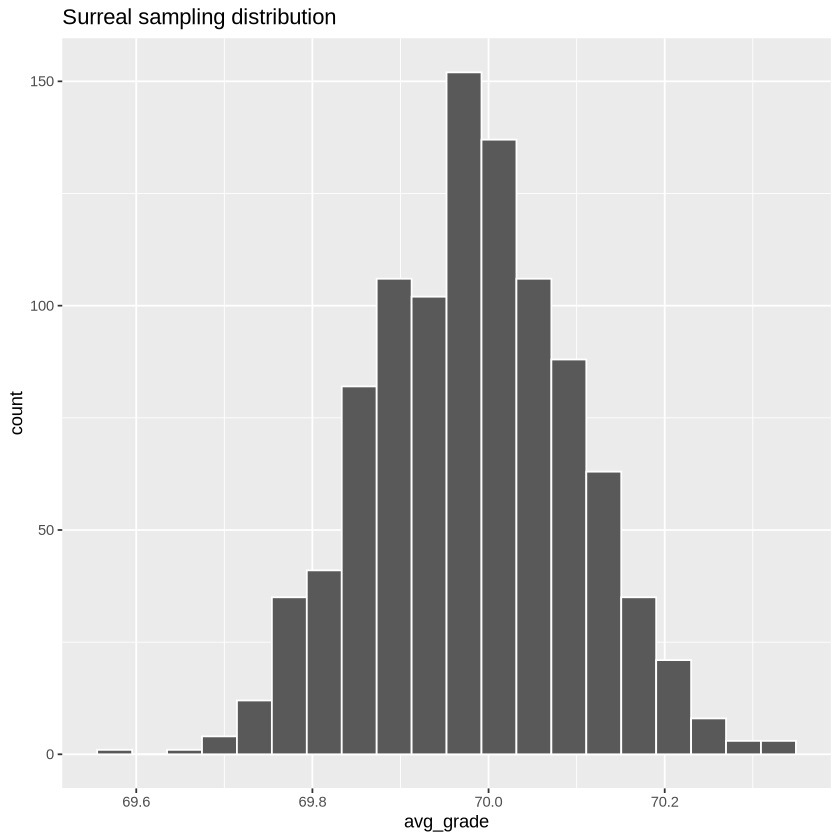

In [63]:
surreal_sampling_dist |> 
    ggplot() + 
    geom_histogram(aes(avg_grade), color='white', bins = 20) + 
    ggtitle('Surreal sampling distribution')

In [64]:
sd(surreal_sampling_dist$avg_grade)

[1] 0.1136973

In [65]:
8/sqrt(50) # this is the actual exact std. error.

[1] 1.131371

#### Bootstrapping

In [66]:
bootstrap_sampling_dist <-
    original_sample |> # See that we are not using the population anymore
    rep_sample_n(reps = 1000, size = n, replace = TRUE) |>
    summarise(avg_grade_boot = mean(grade))

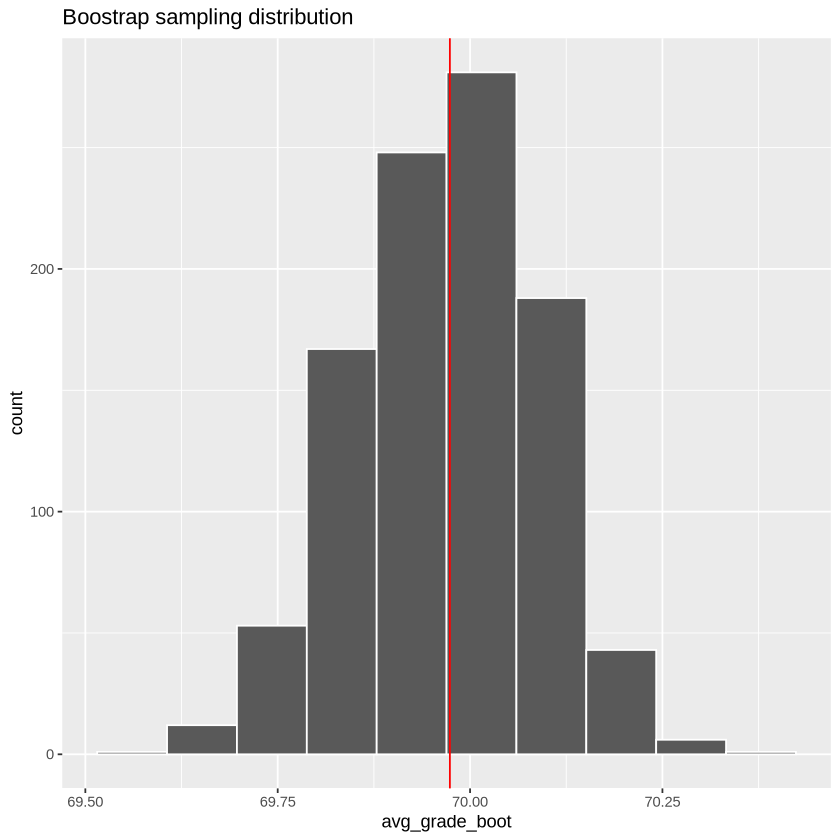

In [67]:
bootstrap_sampling_dist |>
    ggplot() +
    geom_histogram(aes(avg_grade_boot), color = 'white', bins = 10) + 
    ggtitle('Boostrap sampling distribution') +
    geom_vline(xintercept = mean(original_sample$grade), color = 'red')

In [68]:
sd(bootstrap_sampling_dist$avg_grade_boot) # Bootstrap estimate of std. error of xbar

[1] 0.1200867

In [69]:
sd(surreal_sampling_dist$avg_grade) # Surreal estimate of std. error of xbar

[1] 0.1136973

In [70]:
8/sqrt(n) # The actual std error of xbar.

[1] 0.1131371

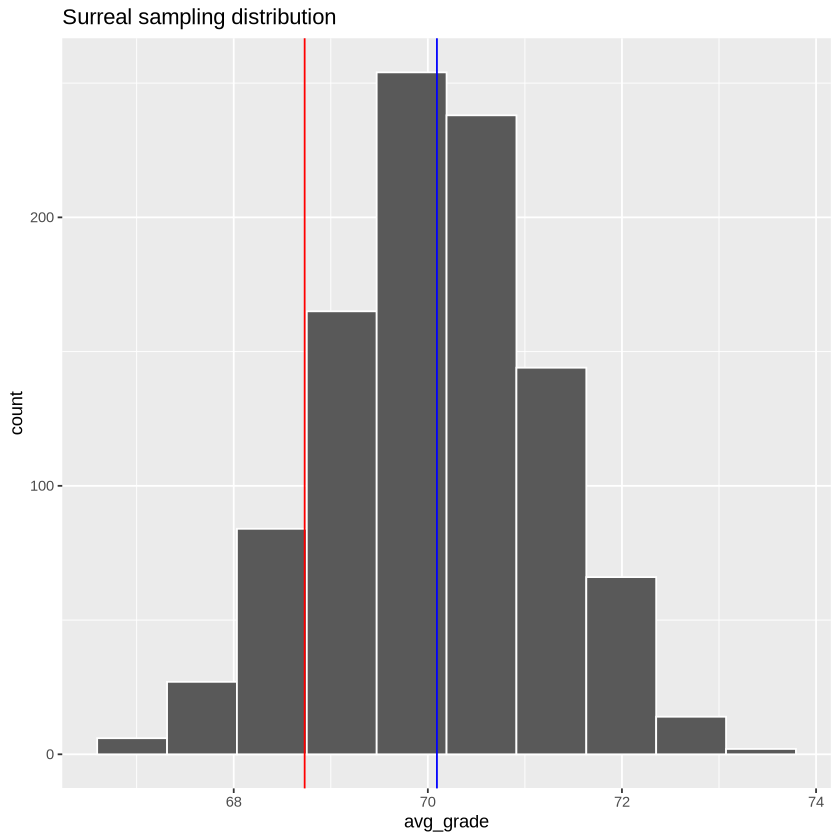

In [42]:
surreal_sampling_dist |> 
    ggplot() + 
    geom_histogram(aes(avg_grade), color='white', bins = 10) + 
    ggtitle('Surreal sampling distribution') + 
    geom_vline(xintercept = mean(population$grade), color = 'blue') + 
    geom_vline(xintercept = mean(original_sample$grade), color = 'red')